# No More Silence -- "Making Sense" of Word2Vec Embeddings by Year

The following notebook show some sample analyses of the computed Word2Vec embeddings by year. This includes plotting word pair similarites by year and plots the difference of two word pairing by year. It also includes a function to get the most similar and dis-similar word vectors for a given word by year. 

In [1]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np

from json import load

from scipy.spatial.distance import cosine, euclidean, correlation, cityblock

### Load Word Vector JSON

In [2]:
years = list(map(str, range(1984,1995)))

# Load JSON into python dictionary
#with open("w2vAll-1-128-100.json") as ifile:
with open("w2vRes128-100.json") as ifile:
    wordVecs = load(ifile)

### Helper Function to Plot Similarity of word pairs by Year
 
Plots similarity of two words compard against a third by year and also plots the difference by year on a second plot. Also adds trendlines

In [13]:
def plotSim(base, word1, word2, metric=cosine):

    # data point lists
    y1 = []
    y2 = []
    x = []

    # add data points / skip if any are missing
    for year in years:
        try:
            # get vecs
            b_v = wordVecs[year][base]
            w1_v = wordVecs[year][word1]
            w2_v = wordVecs[year][word2]

            x.append(int(year))
            
            # calculate simularity
            y1.append(metric(b_v, w1_v))
            y2.append(metric(b_v, w2_v))

        except:
            # skippin missing
            pass
        
    # calculate difference
    diff = [i - j for i,j in zip(y1, y2)]
    
    funcName = str(metric).split()[1]
    plt.figure(figsize=(15,6))
    
    # top ploy
    plt.subplot(1, 2, 1)
    
    # plot pair one with trendline
    z = np.polyfit(x, y1, 1)
    p = np.poly1d(z)
    plt.scatter(x, y1, color="C0", label=word1)
    plt.plot(x,p(x),"C0--")
    
    # plot pair two with trendline
    z = np.polyfit(x, y2, 1)
    p = np.poly1d(z)
    plt.scatter(x, y2, color="C1", label=word2)
    plt.plot(x,p(x),"C1--")
    
    # Add titles and junk
    plt.title(funcName + " distance with respect to '" + base + "' by year")
    plt.ylabel(funcName + " distance")
    plt.legend()
    
    # bottom plot
    plt.subplot(1, 2, 2)
    
    # plot difference with trendline
    z = np.polyfit(x, diff, 1)
    p = np.poly1d(z)
    plt.scatter(x, diff, color='C2')
    plt.plot(x,p(x),"C2--")
    
    # add more titles and junk
    plt.title(funcName+"("+base+","+word1+")" +" - " + funcName+"("+base+","+word2+")" + ' by year')
    plt.xlabel('year')
    plt.ylabel(funcName+"("+base+","+word1+")" +" - " + funcName+"("+base+","+word2+")")
    
    plt.show()

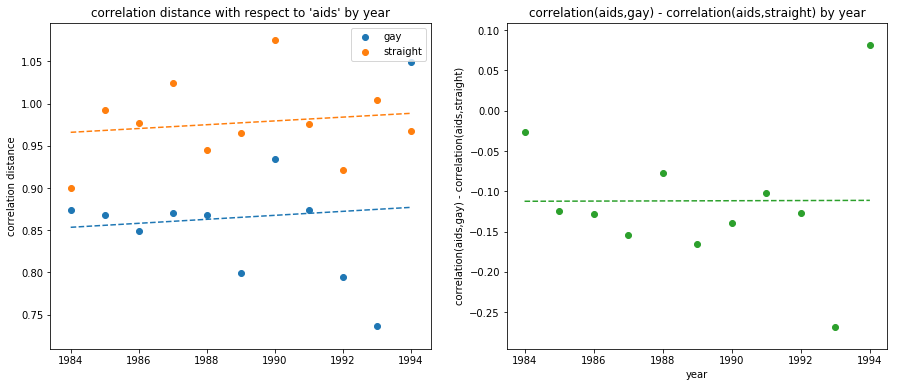

In [14]:
plotSim("aids", "gay", "straight", correlation)

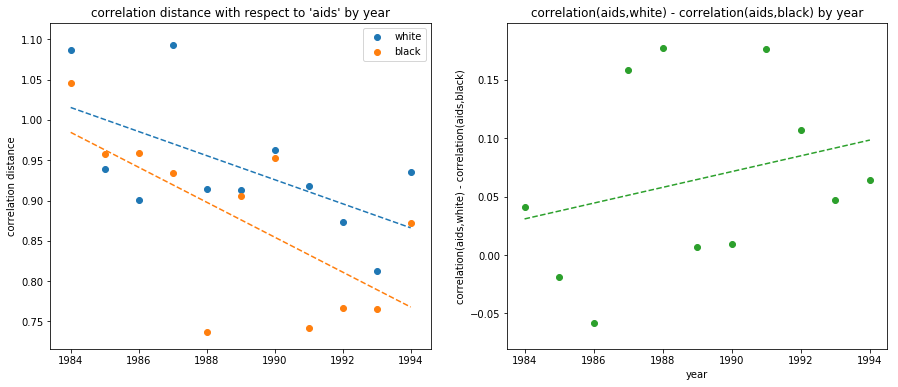

In [15]:
plotSim("aids", "white", "black", correlation)

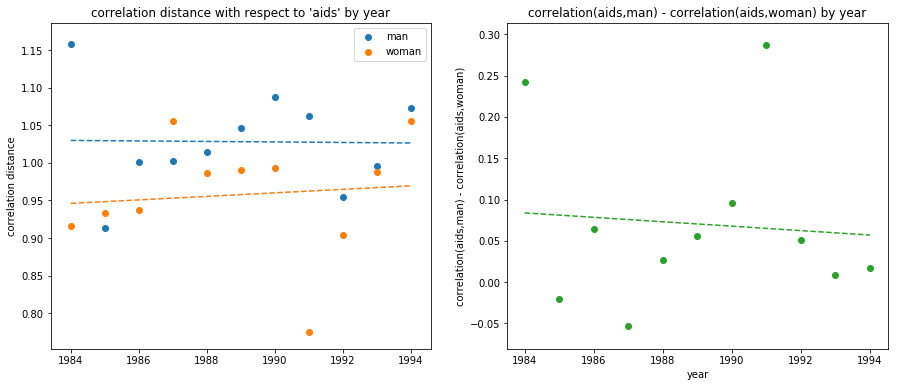

In [16]:
plotSim("aids", "man", "woman", correlation)

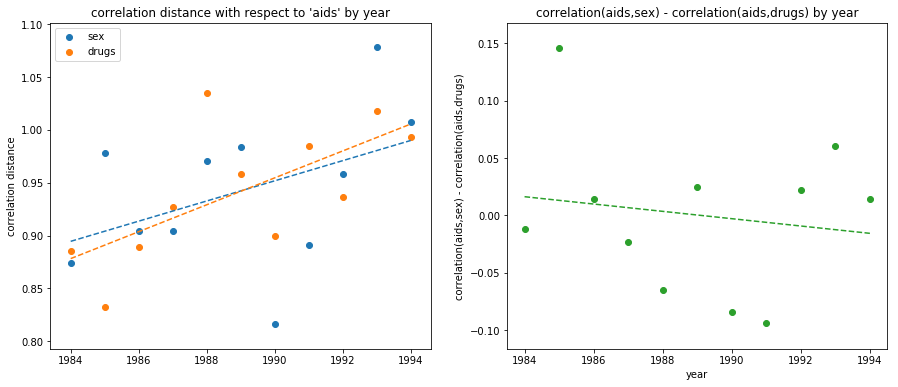

In [17]:
plotSim("aids", "sex", "drugs", correlation)

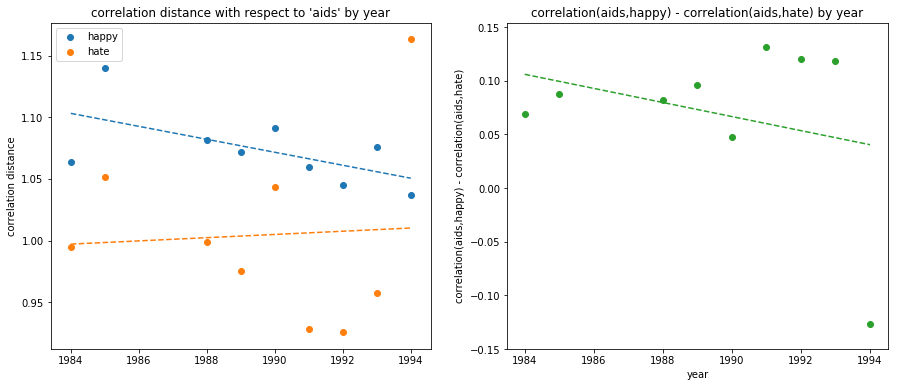

In [18]:
plotSim("aids", "happy", "hate", correlation)

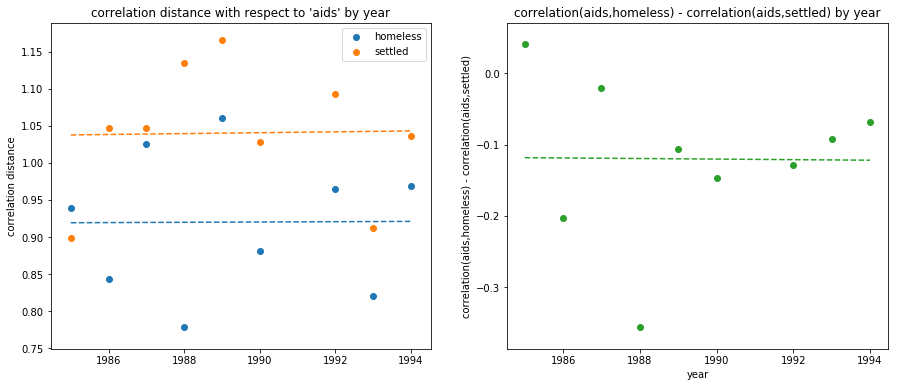

In [19]:
plotSim("aids", "homeless", "settled", correlation)

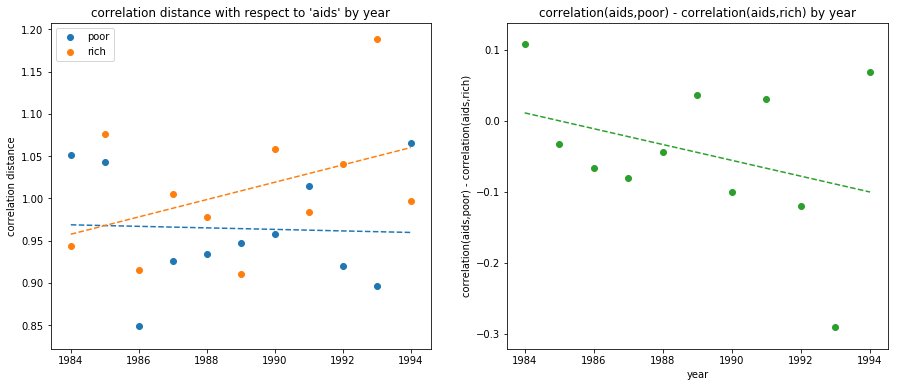

In [20]:
plotSim("aids", "poor", "rich", correlation)

### Functions to find most similar and disimilar

In [21]:
def mostSimilar(year, word, num=10):
    # Get similarity of all words in vocab
    comp = {key : correlation(wordVecs[year][word], vec) for key, vec in wordVecs[year].items() if key != word}
    # retrun num most similar (but not the word itself)
    return [list(comp.keys())[i] for i in np.argsort(list(comp.values()))[0:num]]

def mostDisimilar(year, word, num=10):
    # Get similarity of all words in vocab
    comp = {key : correlation(wordVecs[year][word], vec) for key, vec in wordVecs[year].items()}
    # retrun num most disimilar
    return [list(comp.keys())[i] for i in np.argsort(list(comp.values()))[-num:]]

In [40]:
for year in years:
    try:
        print(year, ":", " ".join(mostSimilar(year, "hiv")))
    except:
        pass

1984 : marin children program continu ros support handled counsel line directory
1985 : impaired marin treats mateo immigrants publishes courses raids alternative cal
1986 : blown antibody innocent teach seropositivity imm signs sero htlviiilav babies
1987 : infection antibody tested exposed test positive infected sero patients knowledge
1988 : infected affected hyv disease learning detecting experiences infection epidemic augmented
1989 : people positive antibody relatively infection individuals confidential legal investigated communities
1990 : infection hyv positive infected antibody virus disease tests sero tested
1991 : infection infected rates positive rate education impacted aids contain bonnie
1992 : related disease disabling rulings epidemic hyv mydaughterishiv populations women population
1993 : infection infected positive disease antibody mydaughterishiv hyv testing antigen population
1994 : infection test positive persons antibody disabling condition application virus bacte

In [41]:
for year in years:
    try:
        print(year, ":", " ".join(mostDisimilar(year, "aids")))
    except:
        pass

1984 : bent meal cold doctrine running privacy accorded constitutionally das satisfy
1985 : waste explicitly resentment stupid enjoying futility discipline unspoken dictate listener
1986 : earnings correct paragraph lax adjournment adjourned steam roof closed forfeiture
1987 : geary houses variously mounted resinous adapted vegetarian expectations room foreman
1988 : davies evaluation lord sie enthusiastic mexico oper undermine resigned specifies
1989 : continuous preference maintenance orchestra mitten vial acknowledgments assigned standards typed
1990 : arrangement investigations champagne admitted walked myron quarters ernest verts ray
1991 : ose quant directive shouldn emerge tent spoken connections paraphrase quote
1992 : rale caused grain repayment expend earnings account method handled rectify
1993 : gard judy gas physically company hangin reception properties entries furnished
1994 : chip strayed convenient economically reductions altogether consumption puppy clutch depreciatio